# Plotting MOF rates

Loading modules

In [1]:
from matplotlib.pyplot import figure,show,plot,errorbar,subplots,xlabel,ylabel,subplots_adjust,savefig,gca,legend,xlim,annotate
from matplotlib import rc
from numpy import loadtxt,arange,array,sqrt,linspace
from mof_lattice import MOF_lattice,MOF_data,MOF
from os import listdir,getcwd,path,walk

parameters

In [2]:
n=100
off=0.0075

Loading MOF calculated data

In [3]:
f=MOF("800/")

Temperature and chemical potential ranges

In [4]:
temp=linspace(f.path.min()-0.01,f.path.max()+0.01,n)
mu=f.mu*temp

Calculating theoretical values

In [5]:
mof=MOF_lattice(f.length,f.E_s,f.E_m,f.E_t)
rho=mof.get_loading(mu,temp)

plotting the theoretical values

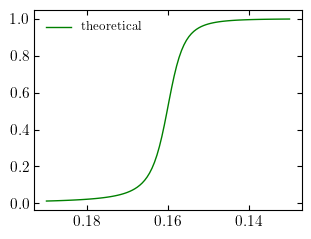

In [6]:
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")
legend(frameon=False)
gca().invert_xaxis()

Folders to read

In [7]:
d=next(walk('.'))[1]
print(d)

['200', '800', '.ipynb_checkpoints', '600', '100', '50', '400']


In [8]:
d=["100","200","400","800"]

Reading and plotting MOF data with various temperature ramp rates

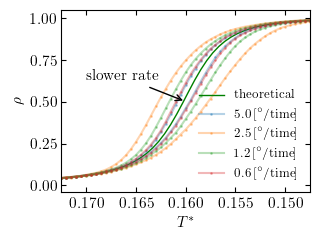

In [9]:
plot(temp,rho,'g-',linewidth=1.0,label=r"theoretical")

for a in d:
    f=MOF(a)
    #errorbar(f.path,f.rho.mean,yerr=sqrt(f.rho.var),linewidth=1.00,elinewidth=6.00,ecolor="y",barsabove=True,color="r",alpha=0.66)
    #ax1.vlines(f.path,ymin=f.rho.min,ymax=f.rho.max,linewidth=0.66,alpha=1.0)
    plot(f.path,f.rho.mean,"o-",markersize=1.0,alpha=0.33,label=r"$%.1lf\,[^\circ/\mathrm{time}]$"%(1e6*0.0005/(float(a))))

annotate(r"slower rate",xy=(0.16,0.5),xytext=(0.17,0.625),arrowprops=dict(arrowstyle="->"))

legend(frameon=False)
xlim(f.path.min()+off,f.path.max()-off)

gca().invert_xaxis()

xlabel(r"$T^*$")
ylabel(r"$\rho$")

subplots_adjust(left=0.18,bottom=0.18)
savefig("mof.png")
savefig("mof.pdf")

show()